# Analisi Separata per Emozione - Lessico ELIta
Questo notebook analizza le parole del lessico ELIta concentrandosi su **ciascuna delle 8 emozioni base** di Plutchik separatamente.

**Focus**:
- Solo parole (no emoji)
- Solo 8 emozioni base (no Amore, Neutrale)
- No dimensioni VAD

**Emozioni analizzate**: Gioia, Tristezza, Rabbia, Paura, Disgusto, Fiducia, Sorpresa, Aspettativa

## Setup e Caricamento Dati

In [72]:
import pandas as pd
import emoji
import plotly.express as px
from Visualizzazione.emotion_config import EMOTION_COLORS, BASIC_EMOTIONS
import plotly.io as pio

pio.renderers.default = "notebook_connected"

pivotedData = pd.read_csv("ELIta_INTENSITY_Matrix.csv", index_col=0)

def is_likely_emoji(text):
    return emoji.emoji_count(str(text)) > 0

pivotedData['is_emoji'] = [is_likely_emoji(x) for x in pivotedData.index]
df_words = pivotedData[pivotedData['is_emoji'] == False].copy()

df_words = df_words[BASIC_EMOTIONS]

print(f"Dataset pronto: {len(df_words)} parole testuali.")
print(f"Feature utilizzate: {BASIC_EMOTIONS}")

Dataset pronto: 6719 parole testuali.
Feature utilizzate: ['gioia', 'tristezza', 'rabbia', 'paura', 'disgusto', 'fiducia', 'sorpresa', 'aspettativa']


## Filtraggio Parole per Emozione
Decidiamo una soglia per definire l'emozione dominate di una parola.
Prima di decidere, dobbiamo guardare come sono distribuiti i dati.

In [73]:
all_values = df_words.values.flatten() # Otteniamo tutti i valori in un array 1D
non_zero_values = all_values[all_values > 0] # Escludiamo gli 0 per la visualizzazione

fig = px.histogram(
    x=non_zero_values,
    nbins=50,
    title="Distribuzione dei punteggi di intensità (esclusi gli 0)",
    labels={'x': 'Punteggio Intensità', 'y': 'Conteggio Parole'}
)
fig.add_vline(x=0.5, line_dash="dash", line_color="red", annotation_text="Soglia 0.5")
fig.show()

print("Parole conservate con soglia > 0.5:") # Calcoliamo quante parole superano la soglia per ciascuna emozione
for emo in BASIC_EMOTIONS:
    count = len(df_words[df_words[emo] > 0.5])
    print(f"- {emo.capitalize()}: {count}")

Parole conservate con soglia > 0.5:
- Gioia: 1550
- Tristezza: 956
- Rabbia: 1012
- Paura: 1092
- Disgusto: 516
- Fiducia: 1133
- Sorpresa: 863
- Aspettativa: 1862


Notiamo che la maggior parte delle parole ha punteggi bassi. Scegliamo una soglia di **0.25** (depolmente associato) per includere più parole nell'analisi.

In [74]:
print("Parole conservate con soglia > 0.25:") # Calcoliamo quante parole superano la soglia per ciascuna emozione
for emo in BASIC_EMOTIONS:
    count = len(df_words[df_words[emo] > 0.25])
    print(f"- {emo.capitalize()}: {count}")

Parole conservate con soglia > 0.25:
- Gioia: 2744
- Tristezza: 2030
- Rabbia: 1932
- Paura: 2281
- Disgusto: 1238
- Fiducia: 2556
- Sorpresa: 2317
- Aspettativa: 3676


---
# Grafici PCA Separati per Emozione
Creiamo 8 grafici PCA distinti, uno per ogni emozione, mostrando tre soglie di intensità: 0.25, 0.5, 0.75.


In [75]:
from IPython.display import display
from Visualizzazione.visualizer import plot_soglie_affiancate

def analizza_emozione_completa(df, emozione, n=15):
    """
    1. Mostra il grafico PCA con soglie affiancate.
    2. Stampa la tabella delle top N parole per intensità.
    """
    print(f"--- Generazione grafici per: {emozione.upper()} ---")
    fig = plot_soglie_affiancate(df, emozione)
    fig.show()
    
    print(f"\n🔝 Top {n} parole più fortemente associate a '{emozione.capitalize()}':")
    
    top_words = df.sort_values(by=emozione, ascending=False)[[emozione]].head(n)
    
    display(top_words.style.bar(subset=[emozione], color='#d65f5f', vmin=0, vmax=1))

### Gioia

In [76]:
analizza_emozione_completa(df_words, 'gioia')

--- Generazione grafici per: GIOIA ---



🔝 Top 15 parole più fortemente associate a 'Gioia':


,gioia
parola,
splendere,1.000000
fidanzamento,1.000000
mare,1.000000
fantastico,1.000000
radioso,1.000000
entusiasta,1.000000
entusiasmare,1.000000
felice,1.000000
felicità,1.000000


### Tristezza

In [77]:
analizza_emozione_completa(df_words, 'tristezza')

--- Generazione grafici per: TRISTEZZA ---



🔝 Top 15 parole più fortemente associate a 'Tristezza':


,tristezza
parola,
tumore,1.000000
disperazione,1.000000
funerale,1.000000
condoglianza,1.000000
nato_morto,1.000000
cancro,1.000000
dipartita,1.000000
lutto,1.000000
addio,1.000000


### Rabbia

In [78]:
analizza_emozione_completa(df_words, 'rabbia')

--- Generazione grafici per: RABBIA ---



🔝 Top 15 parole più fortemente associate a 'Rabbia':


,rabbia
parola,
detestare,1.000000
ripicca,1.000000
falsità,1.000000
incazzarsi,1.000000
incazzare,1.000000
guerra,1.000000
bastarda,1.000000
rapire,1.000000
rancoroso,1.000000


### Paura

In [79]:
analizza_emozione_completa(df_words, 'paura')

--- Generazione grafici per: PAURA ---



🔝 Top 15 parole più fortemente associate a 'Paura':


,paura
parola,
soffocamento,1.000000
terrorismo,1.000000
tetro,1.000000
timore,1.000000
fobia,1.000000
inquietante,1.000000
traumatizzare,1.000000
minaccia,1.000000
serpente_a_sonagli,1.000000


### Disgusto

In [80]:
analizza_emozione_completa(df_words, 'disgusto')

--- Generazione grafici per: DISGUSTO ---



🔝 Top 15 parole più fortemente associate a 'Disgusto':


,disgusto
parola,
schifato,1.000000
marciume,1.000000
disgustare,1.000000
violentare,1.000000
orripilante,1.000000
vomito,1.000000
spregevole,1.000000
puzza,1.000000
inorridire,1.000000


### Fiducia

In [81]:
analizza_emozione_completa(df_words, 'fiducia')

--- Generazione grafici per: FIDUCIA ---



🔝 Top 15 parole più fortemente associate a 'Fiducia':


,fiducia
parola,
fede,1.000000
fiducia,1.000000
fiducioso,1.000000
affidabile,1.000000
sostenitore,1.000000
meta,1.000000
salvare,1.000000
fedeltà,1.000000
fidato,1.000000


### Sorpresa

In [82]:
analizza_emozione_completa(df_words, 'sorpresa')

--- Generazione grafici per: SORPRESA ---



🔝 Top 15 parole più fortemente associate a 'Sorpresa':


,sorpresa
parola,
sbalordire,1.000000
festeggiare,1.000000
inaspettato,1.000000
sbalordito,1.000000
rivelazione,1.000000
stupore,1.000000
sorpresa,1.000000
meraviglia,1.000000
sorprendente,1.000000


### Aspettativa

In [83]:
analizza_emozione_completa(df_words, 'aspettativa')

--- Generazione grafici per: ASPETTATIVA ---



🔝 Top 15 parole più fortemente associate a 'Aspettativa':


,aspettativa
parola,
laurea,1.000000
entusiasta,1.000000
ottimismo,1.000000
meta,1.000000
principio,1.000000
fidanzarsi,1.000000
percorso,1.000000
iniziare,1.000000
aspettativa,1.000000


---

# Parole Ambigue
In questa sezione, identifichiamo parole che mostrano punteggi elevati in più emozioni, indicando ambiguità emotiva.

In [84]:
from Visualizzazione.visualizer import plot_complesse_confronto
from Visualizzazione.pca_utils import trova_parole_complesse

fig = plot_complesse_confronto(df_words)
fig.show()

In [85]:
complessissime = trova_parole_complesse(df_words, soglia=0.75)
complessissime

,gioia,tristezza,rabbia,paura,disgusto,fiducia,sorpresa,aspettativa
parola,,,,,,,,
abbandonare,0.00,1.00,0.92,0.96,0.92,0.17,0.46,0.46
abbandonato,0.00,1.00,0.83,0.83,0.54,0.00,0.17,0.17
abbellimento,0.92,0.00,0.00,0.00,0.00,0.58,0.67,0.79
abbraccio,1.00,0.58,0.04,0.12,0.00,0.83,0.33,0.46
abominevole,0.00,0.50,0.54,0.79,0.96,0.00,0.29,0.00
...,...,...,...,...,...,...,...,...
vivere,0.92,0.17,0.04,0.29,0.00,0.83,0.71,0.92
volontario,0.83,0.17,0.12,0.17,0.04,0.79,0.46,0.83
weekend,1.00,0.04,0.04,0.17,0.04,0.58,0.54,0.92


# TruncatedSVD Separato per Emozione

In [86]:
from Visualizzazione.visualizer import plot_svd_soglie_affiancate

fig_svd = plot_svd_soglie_affiancate(df_words, 'gioia')
fig_svd.show()

In [87]:
fig_svd = plot_svd_soglie_affiancate(df_words, 'tristezza')
fig_svd.show()

In [88]:
fig_svd = plot_svd_soglie_affiancate(df_words, 'rabbia')
fig_svd.show()

In [89]:
fig_svd = plot_svd_soglie_affiancate(df_words, 'paura')
fig_svd.show()

In [90]:
fig_svd = plot_svd_soglie_affiancate(df_words, 'disgusto')
fig_svd.show()

In [91]:
fig_svd = plot_svd_soglie_affiancate(df_words, 'fiducia')
fig_svd.show()

In [92]:
fig_svd = plot_svd_soglie_affiancate(df_words, 'sorpresa')
fig_svd.show()

In [93]:
fig_svd = plot_svd_soglie_affiancate(df_words, 'aspettativa')
fig_svd.show()

---
# Matrice di Correlazione tra Emozioni
Anche se l'analisi è separata, è interessante vedere come le emozioni si correlano tra loro. 

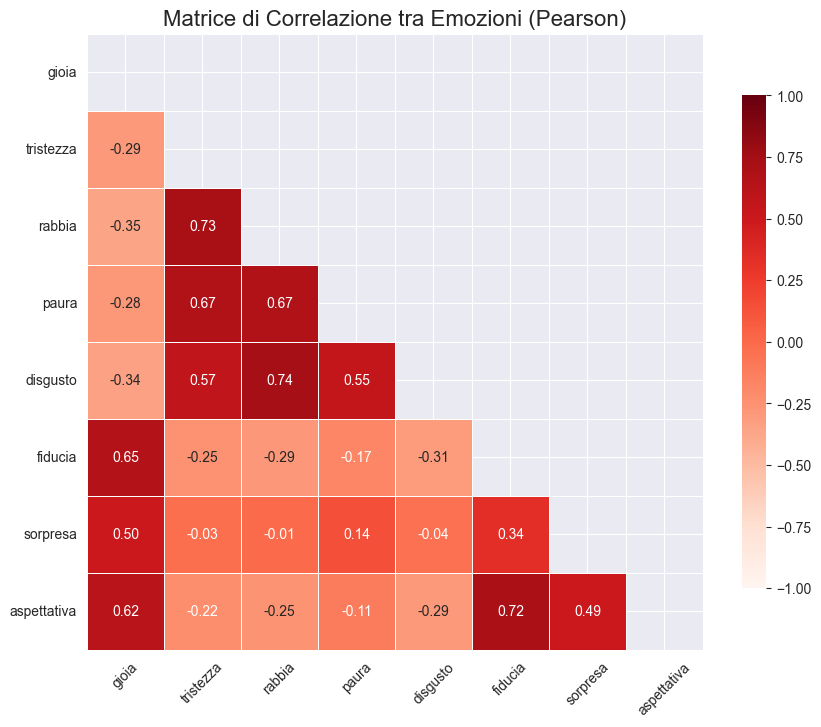

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_correlation_matrix_static(df):
    
    corr = df[BASIC_EMOTIONS].corr() # Matrice di correlazione Pearson

    mask = np.triu(np.ones_like(corr, dtype=bool)) # Maschera per nascondere la metà superiore

    plt.figure(figsize=(10, 8))
    
    sns.heatmap(
        corr, 
        mask=mask, 
        annot=True,           # Scrive i numeri dentro i quadrati
        fmt=".2f",            # Formato a 2 decimali
        cmap='Reds',     # Colormap rosso-blu
        vmin=-1, vmax=1,      # Scala da -1 a 1
        cbar_kws={"shrink": .8},
        square=True,
        linewidths=.5
    )

    plt.title("Matrice di Correlazione tra Emozioni (Pearson)", fontsize=16)
    plt.yticks(rotation=0) 
    plt.xticks(rotation=45)
    plt.show()

plot_correlation_matrix_static(df_words)